In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline 
tf.__version__

'2.10.0'

In [3]:
# setting up names for the dataset 

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 18s 0us/step


In [5]:
X_train = X_train / 255.0

X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test = X_test / 255.0

X_test.shape

(10000, 32, 32, 3)

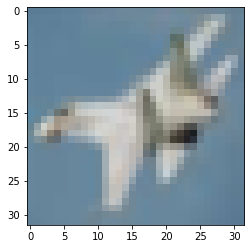

In [7]:
plt.imshow(X_test[10])

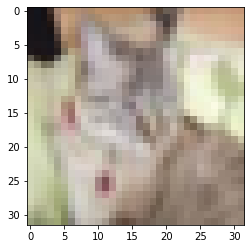

In [8]:
plt.imshow(X_test[8])

In [10]:
# first CNN layer 

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding="same", activation="relu", input_shape=[32, 32, 3]))

In [12]:
# Second CNN layer 

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [13]:
# Third CNN layer 

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [14]:
# Fourth CNN layer 

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [15]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))

In [17]:
# First Dense Layer 

model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

In [18]:
# Second Dense layer 


model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        416       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [22]:
model.fit(X_train, y_train, epochs=4, batch_size=128)

Epoch 1/4
391/391 [==============================] - 132s 337ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0997
Epoch 2/4
391/391 [==============================] - 123s 315ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0982
Epoch 3/4
391/391 [==============================] - 122s 311ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0963
Epoch 4/4
391/391 [==============================] - 127s 325ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0960


In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.1002


In [25]:


print("Test Accuracy : {} ".format(test_accuracy))

Test Accuracy : 0.10019999742507935 
